In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# Loading the data from local files. Pre-existing dataset from the torch dataset library

train_data = datasets.MNIST(
    root = "data",
    download = True,
    train = True,
    transform = ToTensor()    
)
test_data = datasets.MNIST(
    root = "data",
    download = True,
    train = False,
    transform = ToTensor()    
)

In [3]:
train_data.__len__()

60000

In [4]:
train_data.__getitem__(0)[0].shape, train_data.__getitem__(0)[1]

(torch.Size([1, 28, 28]), 5)

In [5]:
i = 20
img, label = train_data.__getitem__(i)

4


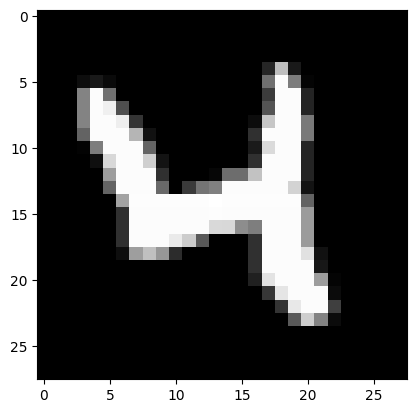

In [6]:
print(label)
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

3


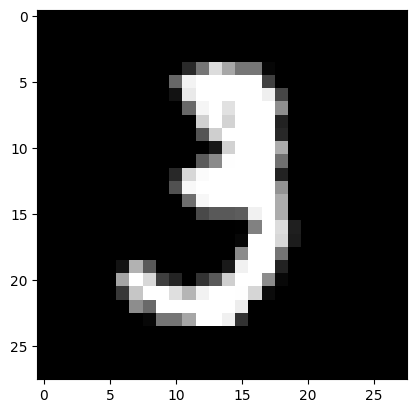

3


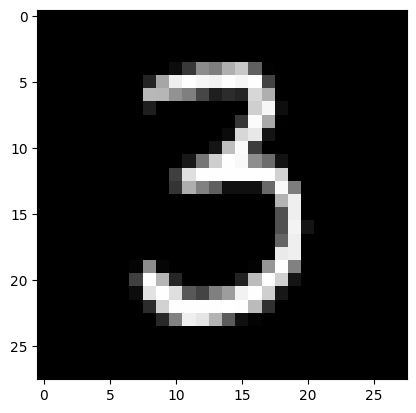

5


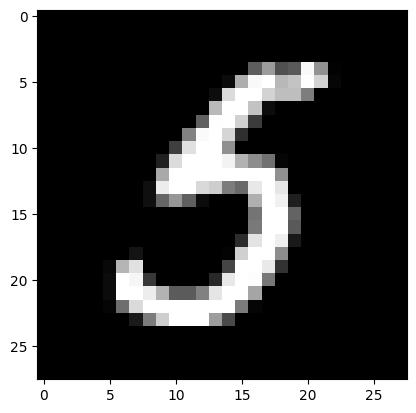

4


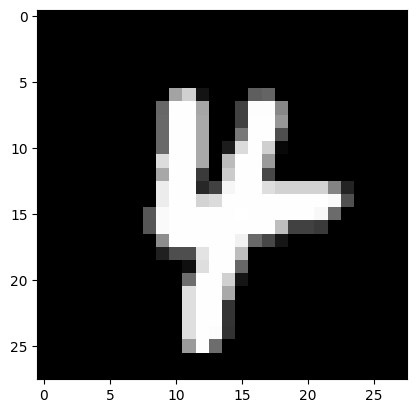

5


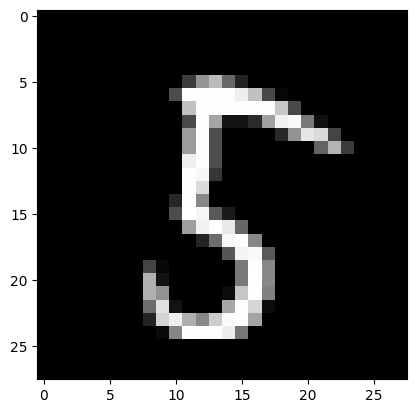

In [7]:
for i in [10, 50, 805, 894, 23158]:
    img, label = train_data.__getitem__(i)
    print(label)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

In [34]:
batch_size = 1024
train_data_loader = DataLoader(train_data, batch_size=batch_size)
test_data_loader = DataLoader(test_data, batch_size=batch_size)

In [35]:
for X, y in train_data_loader:
    print(X.shape, y.shape)
    break

torch.Size([1024, 1, 28, 28]) torch.Size([1024])


In [36]:
y

tensor([5, 0, 4,  ..., 3, 7, 7])

(array([100., 120., 101.,  95., 108.,  92.,  95., 122.,  90., 101.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

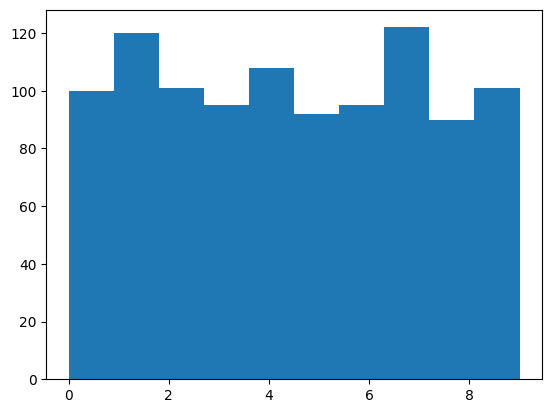

In [37]:
plt.hist(y)

In [38]:
torch.cuda.is_available(), torch.backends.mps.is_available()

(True, False)

In [39]:
device = "cuda"

In [40]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten()
        self.module = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.Softmax()
        )

    def forward(self, x):
        return self.module(self.flat(x))

model = Model().to(device)
print(model)

Model(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (module): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)


In [48]:
def train(model, data, loss_fn, opti):
    model.train()
    for X, y in tqdm(data):
        X, y = X.to(device), y.to(device)

        y_hat = model(X)
        L = loss_fn(y_hat, y)

        L.backward()
    opti.step()
    opti.zero_grad()
def test(model, data, loss_fn):
    model.eval()
    loss = 0
    num_batch = len(data)
    with torch.no_grad():
        for X, y in tqdm(data):
            X, y = X.to(device), y.to(device)
            loss += loss_fn(model(X), y)/num_batch
    print(loss.item())

In [49]:
loss_fn = nn.CrossEntropyLoss()
opti = torch.optim.SGD(model.parameters(), lr = 1e-3)

epochs = 5
for _ in range(epochs):
    train(model, train_data_loader, loss_fn, opti)
    test(model, test_data_loader, loss_fn)

  0%|          | 0/59 [00:00<?, ?it/s]c:\myInstallations\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 10/10 [00:01<00:00,  8.00it/s]


2.30265212059021


100%|██████████| 10/10 [00:01<00:00,  8.14it/s]


2.302628755569458


100%|██████████| 10/10 [00:01<00:00,  7.48it/s]


2.302605390548706


100%|██████████| 10/10 [00:01<00:00,  7.98it/s]


2.302582263946533


100%|██████████| 10/10 [00:01<00:00,  7.45it/s]

2.3025591373443604


In [45]:
torch.cuda.memory_allocated()/1024/1024

18.0390625

In [24]:
loss

NameError: name 'loss' is not defined